<h2> -Netflix Movies and TV Shows Analysis Project 

Netflix, Inc. is an American subscription streaming service and production company. Launched on August 29, 1997, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals and In this dataset, we will deal with more information related to those films or series and the country that produced these works

Done by **Islam Aljuneidi**

<img src="Netflix.jpeg"/>

<h2>Table of contents

<ul>
    
<li><b>Introduction
    
<li><b>Research Question
    
<li><b>Data Wrangling
    
<li><b>Exploratory_Data Analysis
    
<li><b>Feature Engineering
    
<li><b>Conclusion

<h3 id="intro">Introduction

In this section, we will briefly explain our dataset, what it contains, and also what is each column?so our dataset contains 8.8 k rows and 12 columns so we explain once over what does it contains each column?

<ol>
<li>Type:- kind of work
<li>Title:-name of work
<li>Director:-The name of the director who directed the film
<li>Cast:-Names of the actors who participated in the work
<li>Country:-the country that produced these works
<li>Date_added:-Date of adding the movie
<li>Release_year:-The year in which the work was Released
<li>Rating:-Rating the work
<li>Duration:-Duration of work
<li>listed_in:-Genre of work
<li>listed_in:-Genre of work
<li>Description:-Movie or series on any topic

explanation of rating:
<ul>
<li>FV: Fantasy violence (only used with the TV-Y7 rating for action-oriented children's shows).
<li>D:Used with the TV-PG and TV-14 rating to denote the use of sexually suggestive dialogue (usually sexual references). It is not intended to be used in TV-MA shows (but some networks opt for them).
<li>L: Used with the TV-PG, TV-14, and TV-MA ratings to denote instances of crude, offensive language (profanity, vulgar slang, racial and ethnic slurs, etc.).
<li>S: Used with the TV-PG, TV-14, and TV-MA ratings to denote instances of sexual content (including visual innuendo and intercourse).
<li>V: Used with the TV-PG, TV-14, and TV-MA ratings to denote instances of violence.

<h3 id="Ques">Research Questions

-In this section we will ask ourselves what we need from this dataset I think that section is the most important step in data analysis steps because if you ask the right question you will get specific information and according to that  will help you to  make right decisions and efficient.

<ul>
<li>Are there more movies than serials or vice versa?
<li>Which country has more TV shows?
<li>The most year in which works were added?
<li>The most month in which works were added?
<li>The most year in which works were released?
<li>What is the average time it takes to add works, whether movies or TV shows on Netflix?
<li>What are the works that are added to the Netflix network the most?
<li>Are most of the evaluation of movies and series for adults or not?
<li>What is the duration, average, longest, and smallest of the movie or series?  
<li>What kind of work does Netflix produce?

<h3>Import libraries

Now, Let's import some of the various commands and have access to our dataset.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import random
import time
%matplotlib inline
from numpy.polynomial.polynomial import polyfit
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
random.seed(40)

C:\Users\Islam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Islam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<h3>Data Wrangling

let's divide data wrangling to three main factors **Gathering Data,assess and cleaning Data**

<h4>Gathering Data

In [2]:
#import our dataset -the file is csv so we will use read_csv to read our file
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<h4>Assessing Data


at this section we dig into the data if they duplicated rows,missing value or rename columns

In [3]:
#size Dataseet what does it contains
df.shape

(8807, 12)

In [4]:
#names of our columns
for x in list(df.columns[0:]):
    print(x)

show_id
type
title
director
cast
country
date_added
release_year
rating
duration
listed_in
description


In [5]:
#check if there any missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<ul><li>there's missing values we will deal with them later

In [6]:
#check if there any duplicated values
df.duplicated().sum()

0

<ul><li>there isn't any duplicated values at our dataset

In [7]:
#Let's take a quick overview of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
#describe our  numerical Data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
#describe our  Gategorical Data
df.describe(include=[object])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [10]:
# number of non-null unique values for each feature
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

<h4>Data Cleaning


<ul><li>Replace the missing value in director and director columns with the unknown value because if we delete them it will affect our dataset

In [11]:
df["director"].fillna("Unknown", inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

In [12]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [13]:
#drop our missing value we will not replace these data because it's little value not affect our dataset
df.dropna(subset=['date_added','rating','duration','description'],inplace=True)


In [14]:
#rename our columns
df=df.rename(columns={"listed_in":"Genre"})
df.columns=df.columns.str.capitalize()

<h3 id="eda">Exploratory_Data Analysis


<ul><li>Explore our dataset if there are any outliers or find out any value that we didn't detect when we do any numerical computation

In [15]:
#read our Data to explore it
df.head(3)

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Genre,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


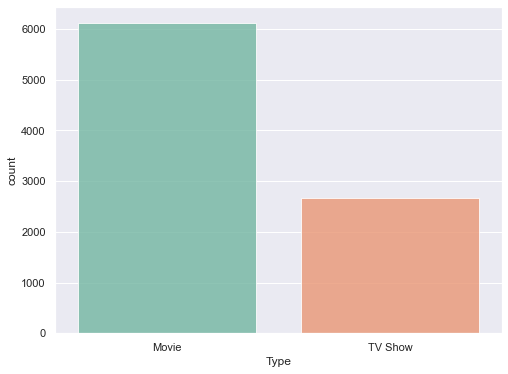

In [16]:
plt.figure(figsize=[8, 6])
sns.set(style="darkgrid")
sns.countplot(data=df,x="Type",alpha=.8,palette="Set2")
plt.show()

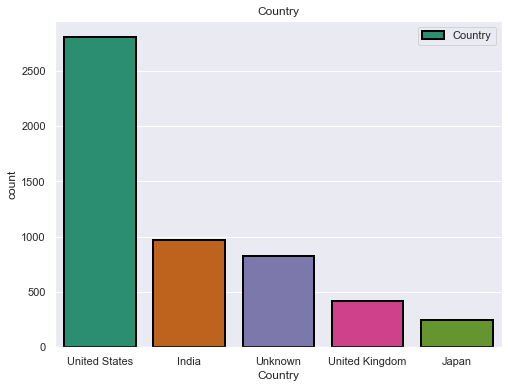

In [17]:
fig=plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.countplot(data=df,x=df["Country"],order = df['Country'].value_counts().iloc[:5].index,edgecolor=(0,0,0),
                  linewidth=2,
                  palette="Dark2",label="Country")
plt.title('Country')
plt.legend()
plt.show()

**We still don't have our questions answered, so stay tuned**
<img src="stay.jpg"/>

<h3>Feature Engineering


<ul><li>In this section, we will add any feature that helps us to dig into easily the data to help us to visualize by easiest way and efficient way

In [18]:
df.head(1)

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Genre,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


<ul><li>Adding columns that will be useful to analysis our data to know in which month or year netflix produced most works


In [19]:
df["Date_added"]=pd.to_datetime(df["Date_added"])
df["Adding_Year"]=pd.to_datetime(df["Date_added"]).dt.year
df["Adding_Month"]=pd.to_datetime(df["Date_added"]).dt.month
df["Time_to_add"]=df["Adding_Year"]-df["Release_year"]

In [20]:
#not need Date_added column any more
df.drop(columns=["Date_added"],inplace=True)

In [21]:
# reindex our columns to better understanding
columns=['Show_id', 'Type', 'Title', 'Director', 'Cast', 'Country',
        'Rating', 'Genre','Duration',
       'Release_year','Adding_Year', 'Adding_Month', 'Time_to_add']
df=df.reindex(columns,axis ='columns')


In [22]:
df.head(3)

,Show_id,Type,Title,Director,Cast,Country,Rating,Genre,Duration,Release_year,Adding_Year,Adding_Month,Time_to_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,PG-13,Documentaries,90 min,2020,2021,9,1
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons,2021,2021,9,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",1 Season,2021,2021,9,0


<h3>Insights into Data

**In this section, we will answer our questions that we asked before**

<ol>
<li>Are there more movies than serials or vice versa?

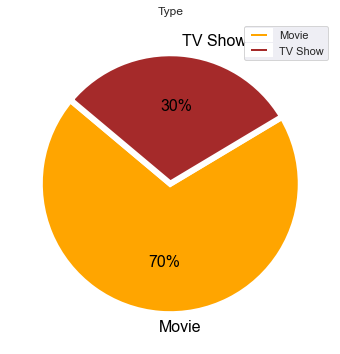

In [23]:
plt.figure(figsize=[10,6])
colors = ( "orange", "brown")
plt.pie(df["Type"].value_counts(),
        startangle = 140,
        textprops = {'color': 'black','fontsize':16},
        wedgeprops = {'linewidth': 6},
        labels=['Movie', 'TV Show'],
        center = (0.1,0.1),
        autopct = '%0.0f%%',colors=colors)
plt.title("Type")
plt.legend()
plt.show()


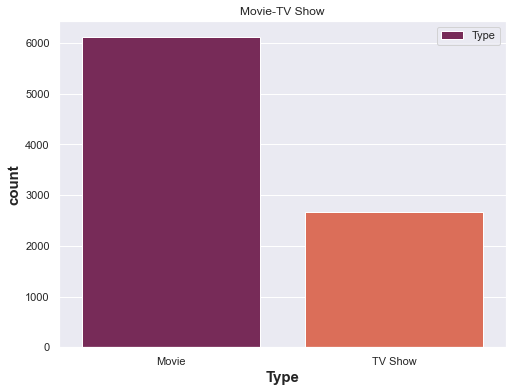

In [24]:
fig=plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.countplot(data=df,x="Type",
                  linewidth=1,
                  label="Type",palette="rocket")

plt.title('Movie-TV Show')
plt.xlabel("Type",fontweight ='bold', fontsize = 15)
plt.ylabel("count",fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()

<ul><li>Note that during this period Netflix produced more movies than TV shows

<ol><li>Which country has more TV shows?


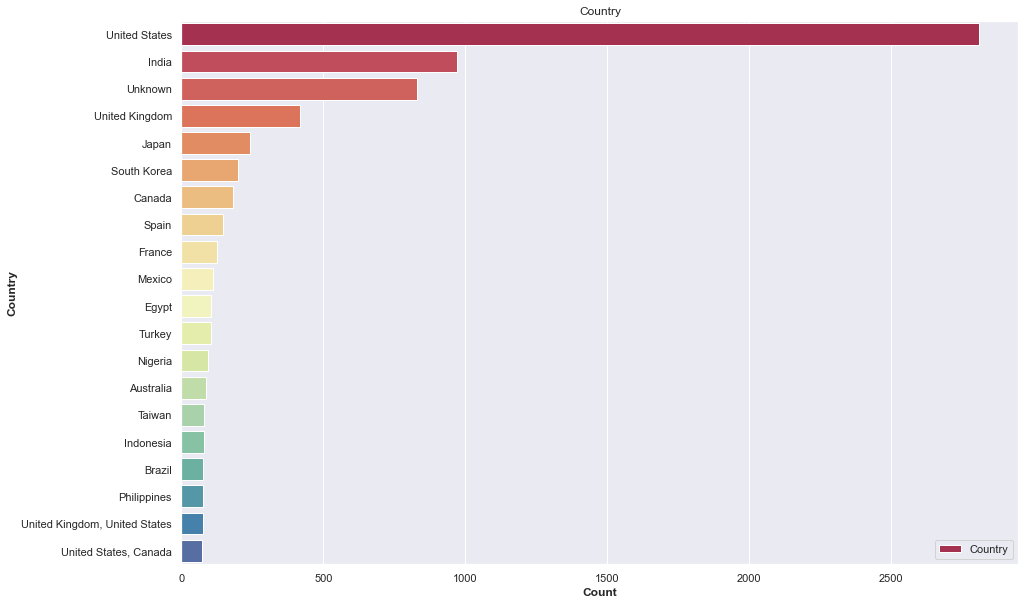

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,y=df["Country"].value_counts().iloc[:20].index,x=df["Country"].value_counts().iloc[:20]
            ,palette="Spectral",label="Country")
plt.title('Country')
plt.xlabel("Count",fontweight ='bold', fontsize = 12)
plt.ylabel("Country",fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()

The Viz display the number of movies and TV shows released by the country.

The United States ranked first in terms of the number of movies and TV shows available, followed by India.

**To be more precise, let's split the data into two parts, one part TV shows and one part movies, to see which countries produce the most amount of this work.**

In [26]:
movie_data=df[df["Type"]=="Movie"]
tv_show_data=df[df["Type"]=="TV Show"]

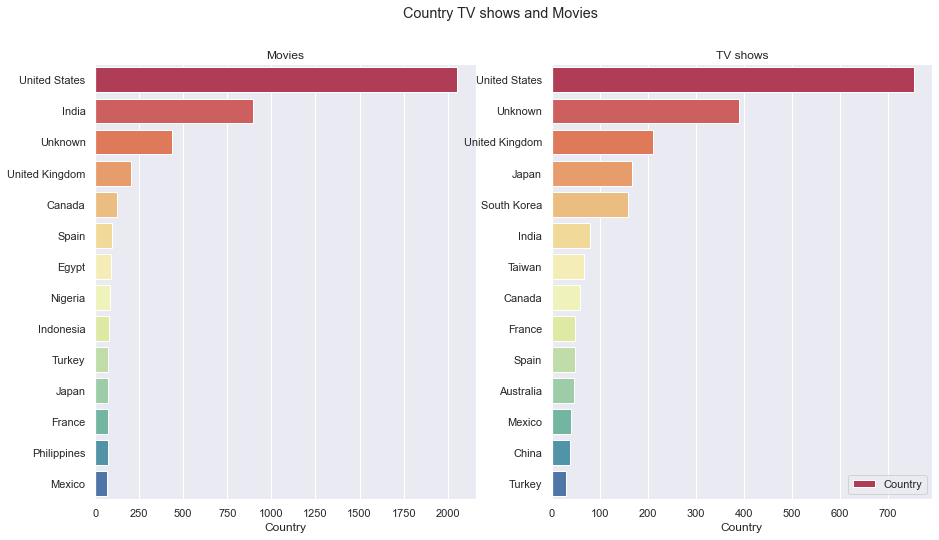

In [27]:
fig,axes=plt.subplots(1,2,figsize=[15,8])

sns.barplot(ax=axes[0],data=movie_data,y=movie_data["Country"].value_counts().iloc[:14].
            index,x=movie_data["Country"].value_counts().iloc[:14]
            ,palette="Spectral",label="Country")

sns.barplot(ax=axes[1],data=tv_show_data,y=tv_show_data["Country"].value_counts().iloc[:14].index,
            x=tv_show_data["Country"].value_counts().iloc[:14]
            ,palette="Spectral",label="Country")

fig.suptitle('Country TV shows and Movies')
axes[0].set_title('Movies')
axes[1].set_title('TV shows')
plt.legend()
plt.show()

C:\Users\Islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


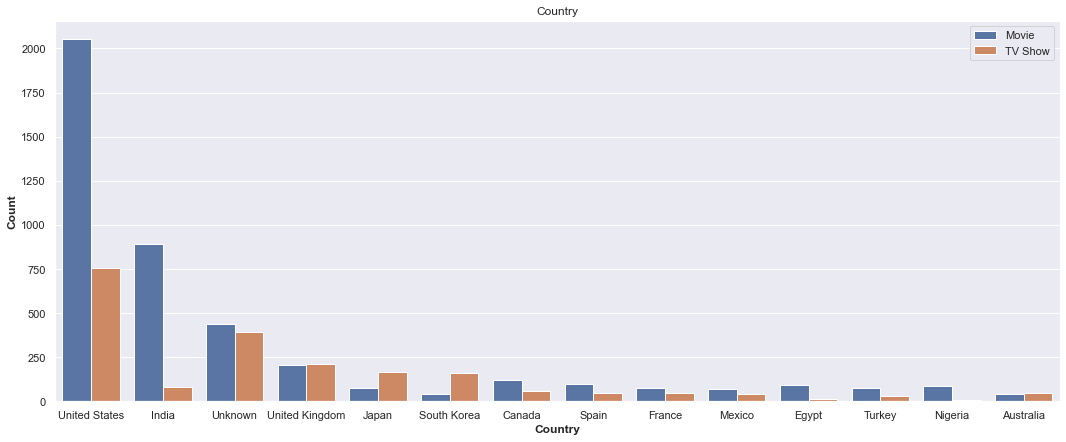

In [28]:
plt.figure(figsize=(18,7))
sns.countplot(df["Country"],hue = df["Type"],
              order = df["Country"].value_counts().index[:14], data = df, palette = 'deep')
plt.title('Country')
plt.ylabel("Count",fontweight ='bold', fontsize = 12)
plt.xlabel("Country",fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()

**The United States ranked first in terms of the number of movies and TV shows available, But India only follows the US in movies but in TV shows, the UK follows the USA**

<ol><li>The most year in which works were added?

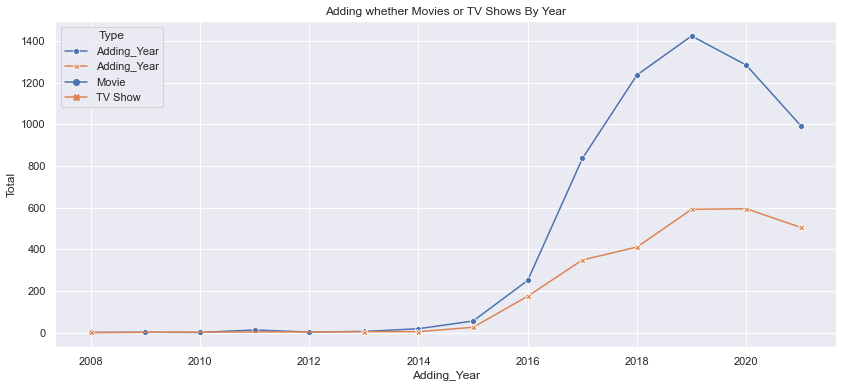

In [29]:
df2=df.groupby(['Adding_Year',"Type"])["Title"].count().reset_index(name='Total')
plt.figure(figsize=[14,6])
plt.title("Adding whether Movies or TV Shows By Year")
sns.lineplot(data=df2,x="Adding_Year",y="Total",hue="Type",style="Type",markers=True, dashes=False,label="Adding_Year")
plt.show()

**Note that during 2018 and 2020, more movies or TV shows were added than in any year**

<ol><li>The most Month in which works were added?

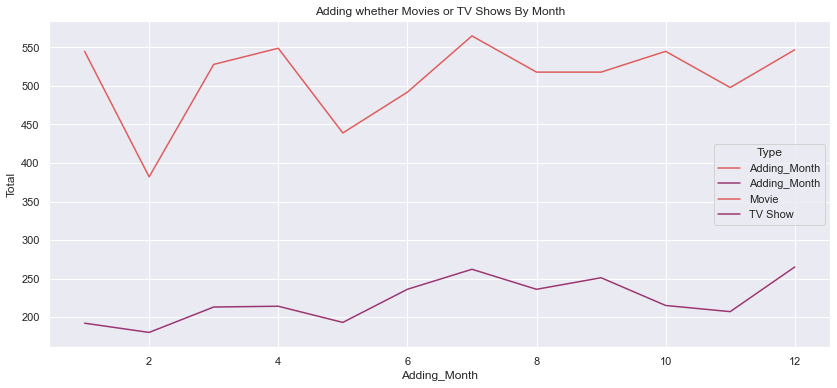

In [30]:
df3=df.groupby(['Adding_Month',"Type"])["Title"].count().reset_index(name='Total')
plt.figure(figsize=[14,6])
plt.title("Adding whether Movies or TV Shows By Month")
sns.lineplot(data=df3,x="Adding_Month",y="Total",hue="Type",palette="flare",markers=True, dashes=False,label="Adding_Month")
plt.show()

**Note that in july movies were added than in any month , in Dec Tv Shows were added than in any month**

<ol><li>The most year in which works were released?


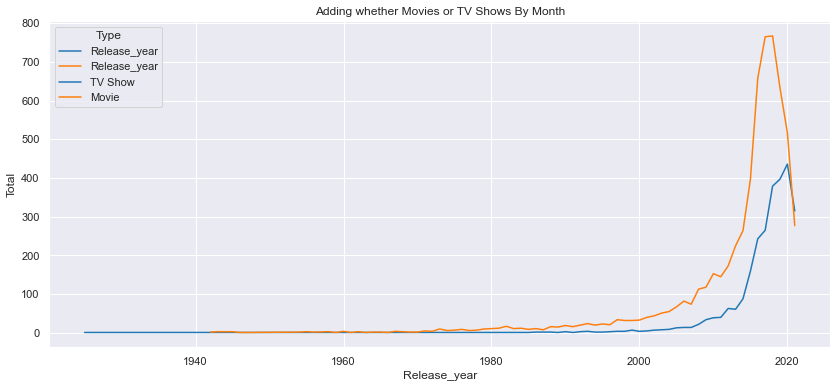

In [31]:
data=df.groupby(["Release_year","Type"])["Title"].count().reset_index(name="Total")
plt.figure(figsize=[14,6])
plt.title("Adding whether Movies or TV Shows By Month")
sns.lineplot(data=data,x="Release_year",y="Total",hue="Type",palette = "tab10",markers=True, dashes=False,label="Release_year")
plt.show()

**Note that during 2018 and 2020, more movies or TV shows were released than in any year**

<ol><li>What is the average time it takes to add works, whether movies or TV shows on Netflix?

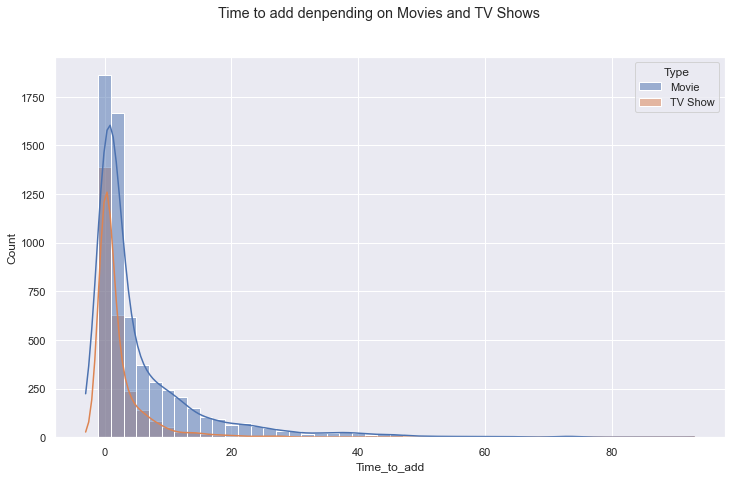

In [32]:
fig=plt.figure(figsize=[12,7])
fig.suptitle('Time to add denpending on Movies and TV Shows')
sns.histplot(x="Time_to_add",hue="Type",data=df,kde=True,binwidth=2)
plt.show()

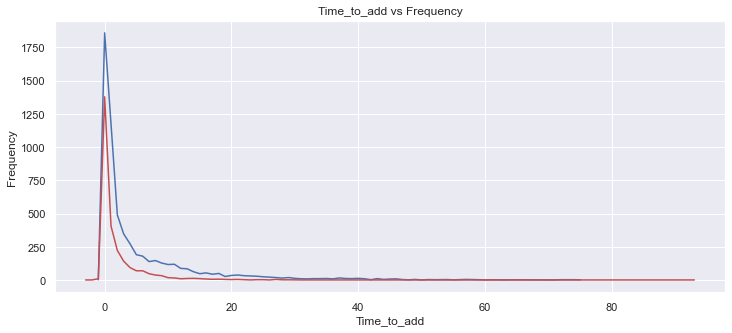

In [33]:
plt.figure(figsize=(12,5))
df[df['Type']=='Movie']['Time_to_add'].value_counts().sort_index().plot.line(color='b')
df[df['Type']=='TV Show']['Time_to_add'].value_counts().sort_index().plot.line(color='r')
plt.xlabel('Time_to_add')
plt.ylabel('Frequency')
plt.title('Time_to_add vs Frequency')
plt.show()

**Most of the works are added in a year on Netflix**

<ol><li>What are the works that are added to the Netflix network the most?

In [34]:
data_genre=df["Genre"].str.split(",",expand=True)
data_genre=data_genre[0].append([data_genre[1],data_genre[2]],ignore_index=False)
data_genre=data_genre.value_counts().sort_values(ascending=False).iloc[:20]
data_genre=data_genre.reset_index(name="Total")
data_genre=data_genre.rename(columns={"index":"Genre"})

<ipython-input-34-c86c289cfec6>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_genre=data_genre[0].append([data_genre[1],data_genre[2]],ignore_index=False)


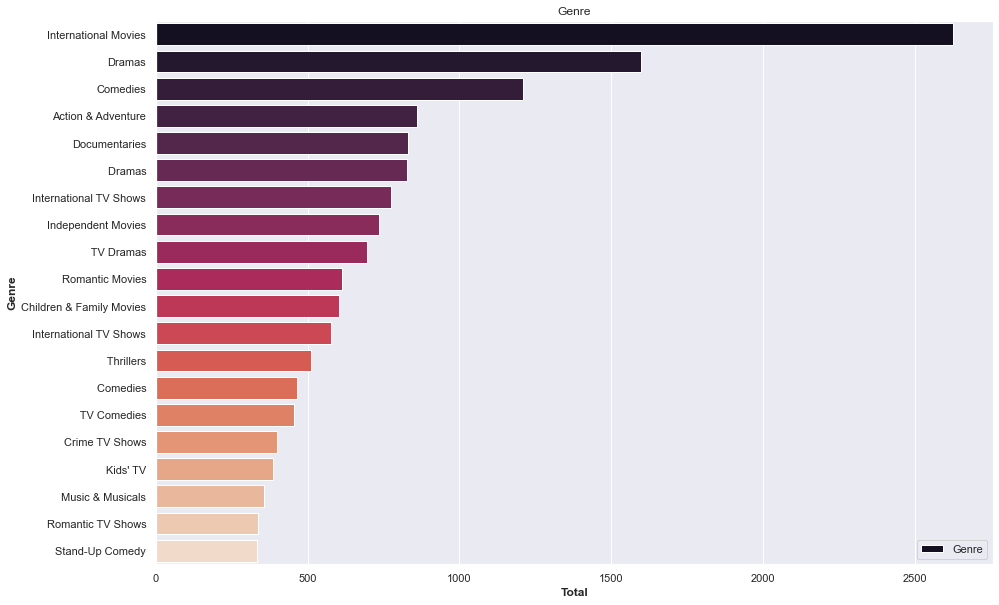

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(data=data_genre,y=data_genre["Genre"],x=data_genre["Total"]
            ,palette="rocket",label="Genre")
plt.title('Genre')
plt.xlabel("Total",fontweight ='bold', fontsize = 12)
plt.ylabel("Genre",fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()

**Most of the works added on Netflix are international films followed by dramas**

<ol><li>The director who produces the most works


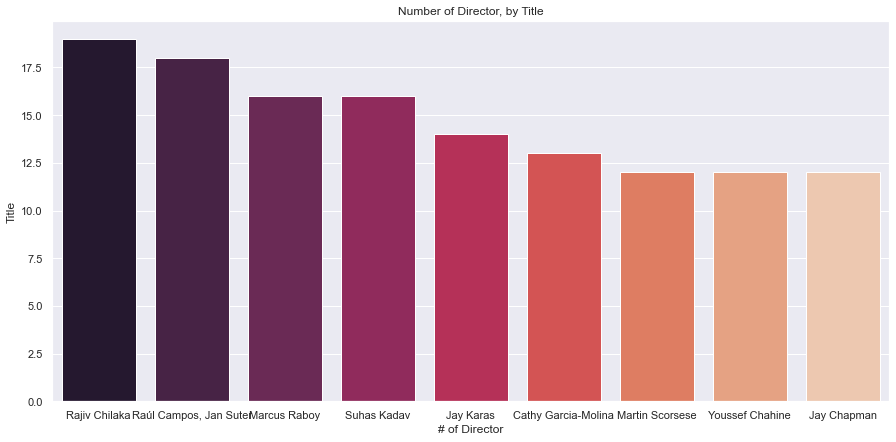

In [36]:
data_director=df.groupby("Director")["Title"].count().sort_values(ascending=False).iloc[1:10].reset_index(name="Total")
plt.figure(figsize=[15,7])
sns.barplot(data=data_director,x=data_director["Director"],y=data_director["Total"],palette="rocket")
plt.title('Number of Director, by Title')
plt.ylabel('Title')
plt.xlabel('# of Director')
plt.show()

**The director who makes movies the most is Rajiv chilaka**

<ol><li><li>What is the duration, average, longest, and smallest of the movie or series?  


In [37]:
durat=[]
for x in movie_data["Duration"]:
    durat.append(x[:-3])
durat=np.array(durat)
durat=durat.astype(int)
movie_data["Duration_Min"]=durat


<ipython-input-37-ea9f7a9ad1ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data["Duration_Min"]=durat


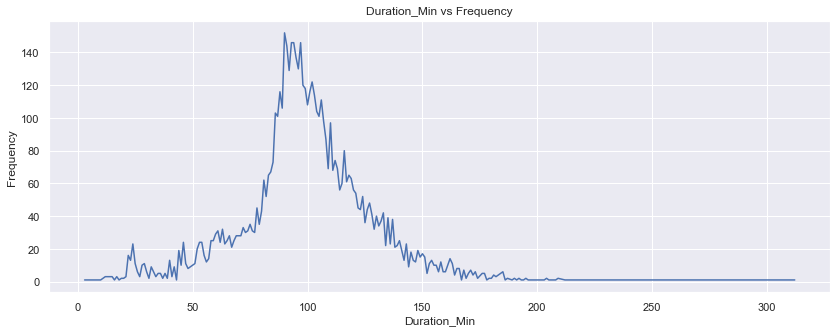

In [38]:
plt.figure(figsize=(14,5))
movie_data["Duration_Min"].value_counts().sort_index().plot.line(color='b')
plt.xlabel('Duration_Min')
plt.ylabel('Frequency')
plt.title('Duration_Min vs Frequency')
plt.show()

**Most films are between 90 and 100 minutes long**

In [39]:
tv_show_data=df[df["Type"]=="TV Show"]
durat=[]
for x in tv_show_data["Duration"]:
    durat.append(x[0:1])
durat=np.array(durat)
durat=durat.astype(int)
tv_show_data["Duration_Min"]=durat


<ipython-input-39-c127e49fe32e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show_data["Duration_Min"]=durat


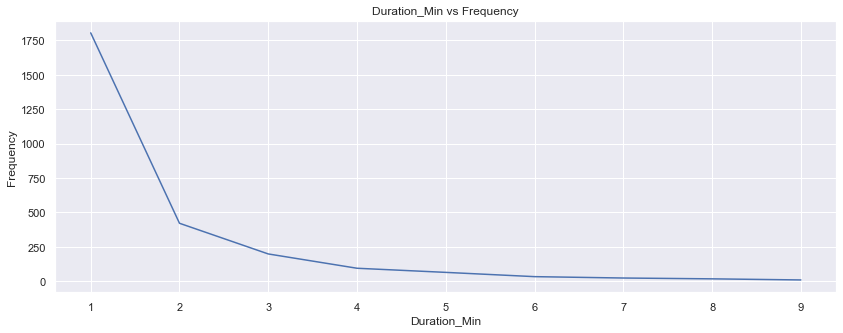

In [40]:
plt.figure(figsize=(14,5))
tv_show_data["Duration_Min"].value_counts().sort_index().plot.line(color='b')
plt.xlabel('Duration_Min')
plt.ylabel('Frequency')
plt.title('Duration_Min vs Frequency')
plt.show()

**Most of the TV shows that are added to Netflix are for one season**

<ol><li>Are most of the evaluation of movies and series for adults or not?


In [41]:
df.head(1)

,Show_id,Type,Title,Director,Cast,Country,Rating,Genre,Duration,Release_year,Adding_Year,Adding_Month,Time_to_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,PG-13,Documentaries,90 min,2020,2021,9,1


In [42]:
data_rating=df.groupby("Rating")["Title"].count().sort_values(ascending=False).iloc[0:4].reset_index(name="Total")


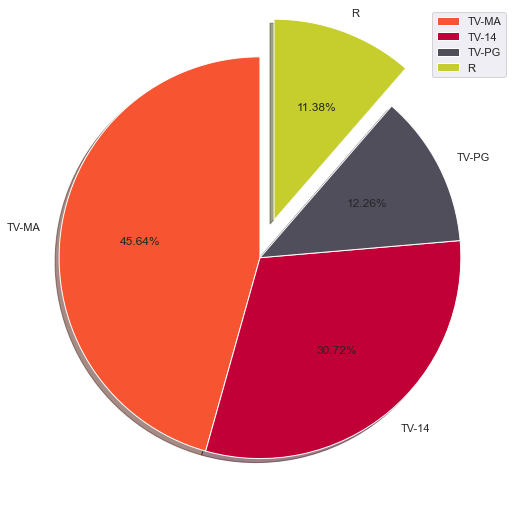

In [43]:
labels=['TV-MA', 'TV-14', 'TV-PG', 'R']
myexplode = [0, 0, 0, 0.2]
plt.figure(figsize=[9,10])
colors = ["#F75431", "#C10037","#504E5B", "#C6CE2D"]
plt.pie(data_rating["Total"].values,labels=labels,colors=colors,shadow=True,startangle = 90,explode=myexplode,autopct='%1.2f%%')
plt.legend()
plt.style.use('ggplot')
plt.grid(True)
plt.show()

**TV-MA  program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.**


<h3>Conclusion


<h4>The following can be concluded:

<ol>
<li> Netflix has a lot more movies than TV shows, 6131 movies and 2666 TV shows to be exact.
<li> Netflix added the most content (movies and TV shows combined) in 2019. Individually, 2019 was the most added movie in a year, and 2020 was the highest added in a year.
<li> More than a third of Netflix's content has a TV-MA rating. The three most common ratings are TV-MA, TV-14, and TV-PG.
<li> The United States has produced most of the content available on Netflix. The three largest countries in terms of production are the United States, India and the United Kingdom.
<li> The top 5 popular categories of content are International Films, Dramas, Comedies, Action, Adventure, and Documentaries.
<li> The top 5 famous directors on Netflix are Rajiv Chilaka, Jan Sutter, Raul Campos, Marcus Raboi and Suhas Kadav.
<li> The top 5 actors on Netflix are Anupam Kher, Rupa Bimani, Takahiro Sakurai, Julie Tijuani and Om Puri.